Superstore Marketing Campaign
Context- A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only 499 dollars which is 999 dollars on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.

Objective - The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict whether a customer will give a positive response.

In [ ]:
import pandas as pd
import numpy as nps
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1GS4kOWVTCKcexmFJE9eLwCudIAtg7Gqa/view?usp=drive_link" # share link to data set

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
superstore = pd.read_csv(csv_raw)
superstore.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# To get the info of the data which includes data types, number of missing values
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Observation**

--> There are 2240 observations and 22 columns.

--> All the columns have 2240 non null values i.e there are no missing values.

In [ ]:
# To find the unique values of every column
superstore.nunique()

,0
Id,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


Observation

--> Id column is the identifier which is unique for each customer and we can drop since it has no significance for the analysis

--> On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

In [ ]:
#dropping the columns
superstore=superstore.drop(['Id'],axis=1)

In [ ]:
superstore.isnull().any()

,0
Year_Birth,False
Education,False
Marital_Status,False
Income,True
Kidhome,False
Teenhome,False
Dt_Customer,False
Recency,False
MntWines,False
MntFruits,False


In [ ]:
data_info = {
    "Data Type": superstore.dtypes,
    "Missing Values":superstore.isnull().sum(),
    "Unique Values": superstore.nunique()
}
data_info_df = pd.DataFrame(data_info)
print("Data Information:\n", data_info_df)

# Assuming the column containing dates is named 'Dt_Customer'
superstore['Dt_Customer'] = pd.to_datetime(superstore['Dt_Customer'])

# Print updated DataFrame info to confirm changes
superstore.info()

Data Information:
                     Data Type  Missing Values  Unique Values
Year_Birth              int64               0             59
Education              object               0              5
Marital_Status         object               0              8
Income                float64              24           1974
Kidhome                 int64               0              3
Teenhome                int64               0              3
Dt_Customer            object               0            663
Recency                 int64               0            100
MntWines                int64               0            776
MntFruits               int64               0            158
MntMeatProducts         int64               0            558
MntFishProducts         int64               0            182
MntSweetProducts        int64               0            177
MntGoldProds            int64               0            213
NumDealsPurchases       int64               0             15
NumWe

In [ ]:
# Creating numerial columns
num_cols = ['Year_Birth','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
            'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

# Creating categorical columns
cat_cols = ['Education','Kidhome','Teenhome','Marital_Status','Response','Complain']

In [ ]:
# Checking summary statistics
superstore[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0


**Observation**

1) Income: The average income is 52,247, with a wide range from 1,730 to 666,666, indicating significant income variability.

2) Kidhome: On average, most homes are having 0 or 1 child and a maximum of 2 kids.

3) Teenhome: On average, most homes are having 0 or 1 teenager and a maximum of 2.

4) Recency: Customers’ last purchase was on average 49 days ago, with a range between 0 to 99 days.

5) MntWines: The average spend on wine is 303.95, with a maximum spend of 1,493, showing that wine is a popular product.

6) MntFruits: The average spend on fruits is 26.30, with a maximum spend of 199, indicating moderate fruit purchases.

7) MntMeatProducts: Customers spend an average of 166.95 on meat, with a maximum spend of 1,725, showing high spending in this category.

8) MntFishProducts: The average spend on fish is 37.53, with a maximum of 259, suggesting lower fish purchases.

9) MntSweetProducts: The average spend on sweets is 27.03, with a maximum of 263, showing moderate spending on sweets.

10) MntGoldProds: Customers spend an average of 44.02 on gold products, with a maximum of 362, indicating niche interest.

11) NumDealsPurchases: Customers use an average of 2.32 deals, with a maximum of 15 deals per person.

12) NumWebPurchases: The average number of web purchases is 4.85, with a maximum of 27, showing a high level of online purchasing.

13) NumCatalogPurchases: The average number of catalog purchases is 2.73, with a maximum of 28 purchases, indicating moderate use of catalogs.

14) NumStorePurchases: Customers make an average of 5.79 store purchases, with a maximum of 13 purchases.

15) NumWebVisitsMonth: The average customer visits the website 5.32 times per month, with a maximum of 20 visits.

16) Response: On average, 14.19% of customers respond to marketing campaigns.

17) Complain: Only about 0.94% of customers have lodged complaints, indicating very few complaints overall


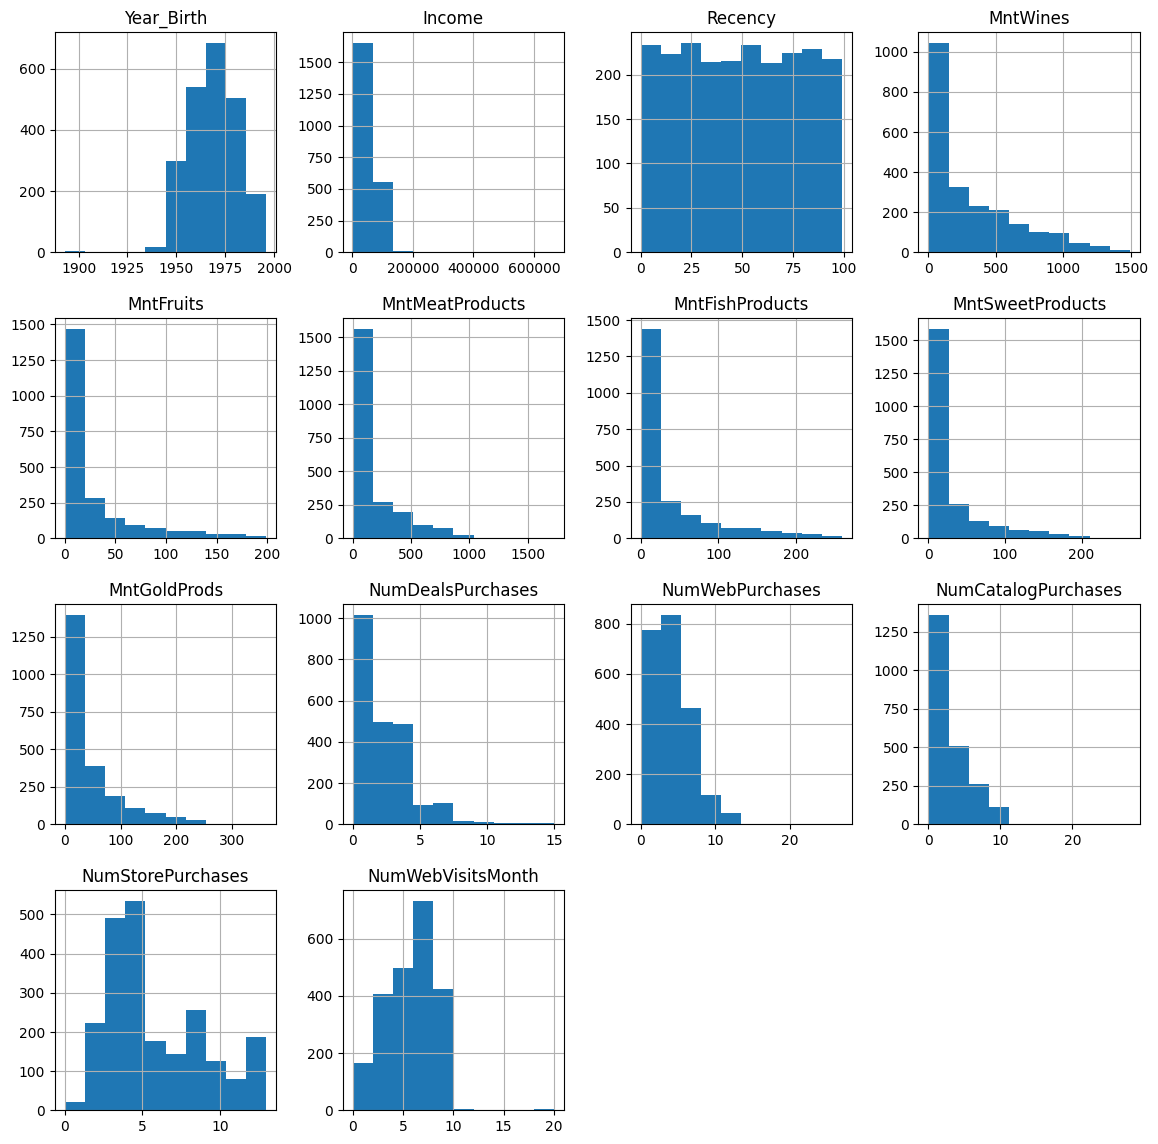

In [ ]:
# creating histograms for numerical variables
superstore[num_cols].hist(figsize=(14,14))
plt.show()

**Observation**

1) Income: Most customers have an income below 100,000, with a small number having very high incomes.

2) Kidhome: Most households have no children, with a smaller number having 1 child, and very few having 2 children.

3) Teenhome: Most households have either no teenagers or 1 teenager, with a small portion having 2 teenagers.

4) Recency: The last purchase distribution is uniform across the 0 to 100-day range, indicating purchases are evenly spread out.

5) MntWines: A large number of customers spend small amounts on wine, with fewer customers spending significant amounts.

6) MntFruits: Most customers spend less than 50 on fruits, with a very small number spending up to 200.

7) MntMeatProducts: A majority spend small amounts on meat, but a few customers spend significantly more.

8) MntFishProducts: Most customers spend very little on fish products, with a steep drop-off in higher spending.

9) MntSweetProducts: Customers typically spend small amounts on sweet products, with very few spending over 100.

10) MntGoldProds: Spending on gold products is minimal for most customers, with only a few spending over 100.

11) NumDealsPurchases: Most customers make very few deal-related purchases, with a sharp decline after 3 or 4 purchases.

12) NumWebPurchases: Web purchases are generally low, with most people making fewer than 5 web purchases.

13) NumCatalogPurchases: Catalog purchases are minimal, with most customers making fewer than 3 catalog purchases.

14) NumStorePurchases: Store purchases have a more even distribution, with peaks around 5 and 7 purchases.

15) NumWebVisitsMonth: Most customers visit the website between 1 to 10 times per month, with very few visiting more than 15 times.

16) Response: The majority of customers have not responded to marketing campaigns, with a small portion responding.


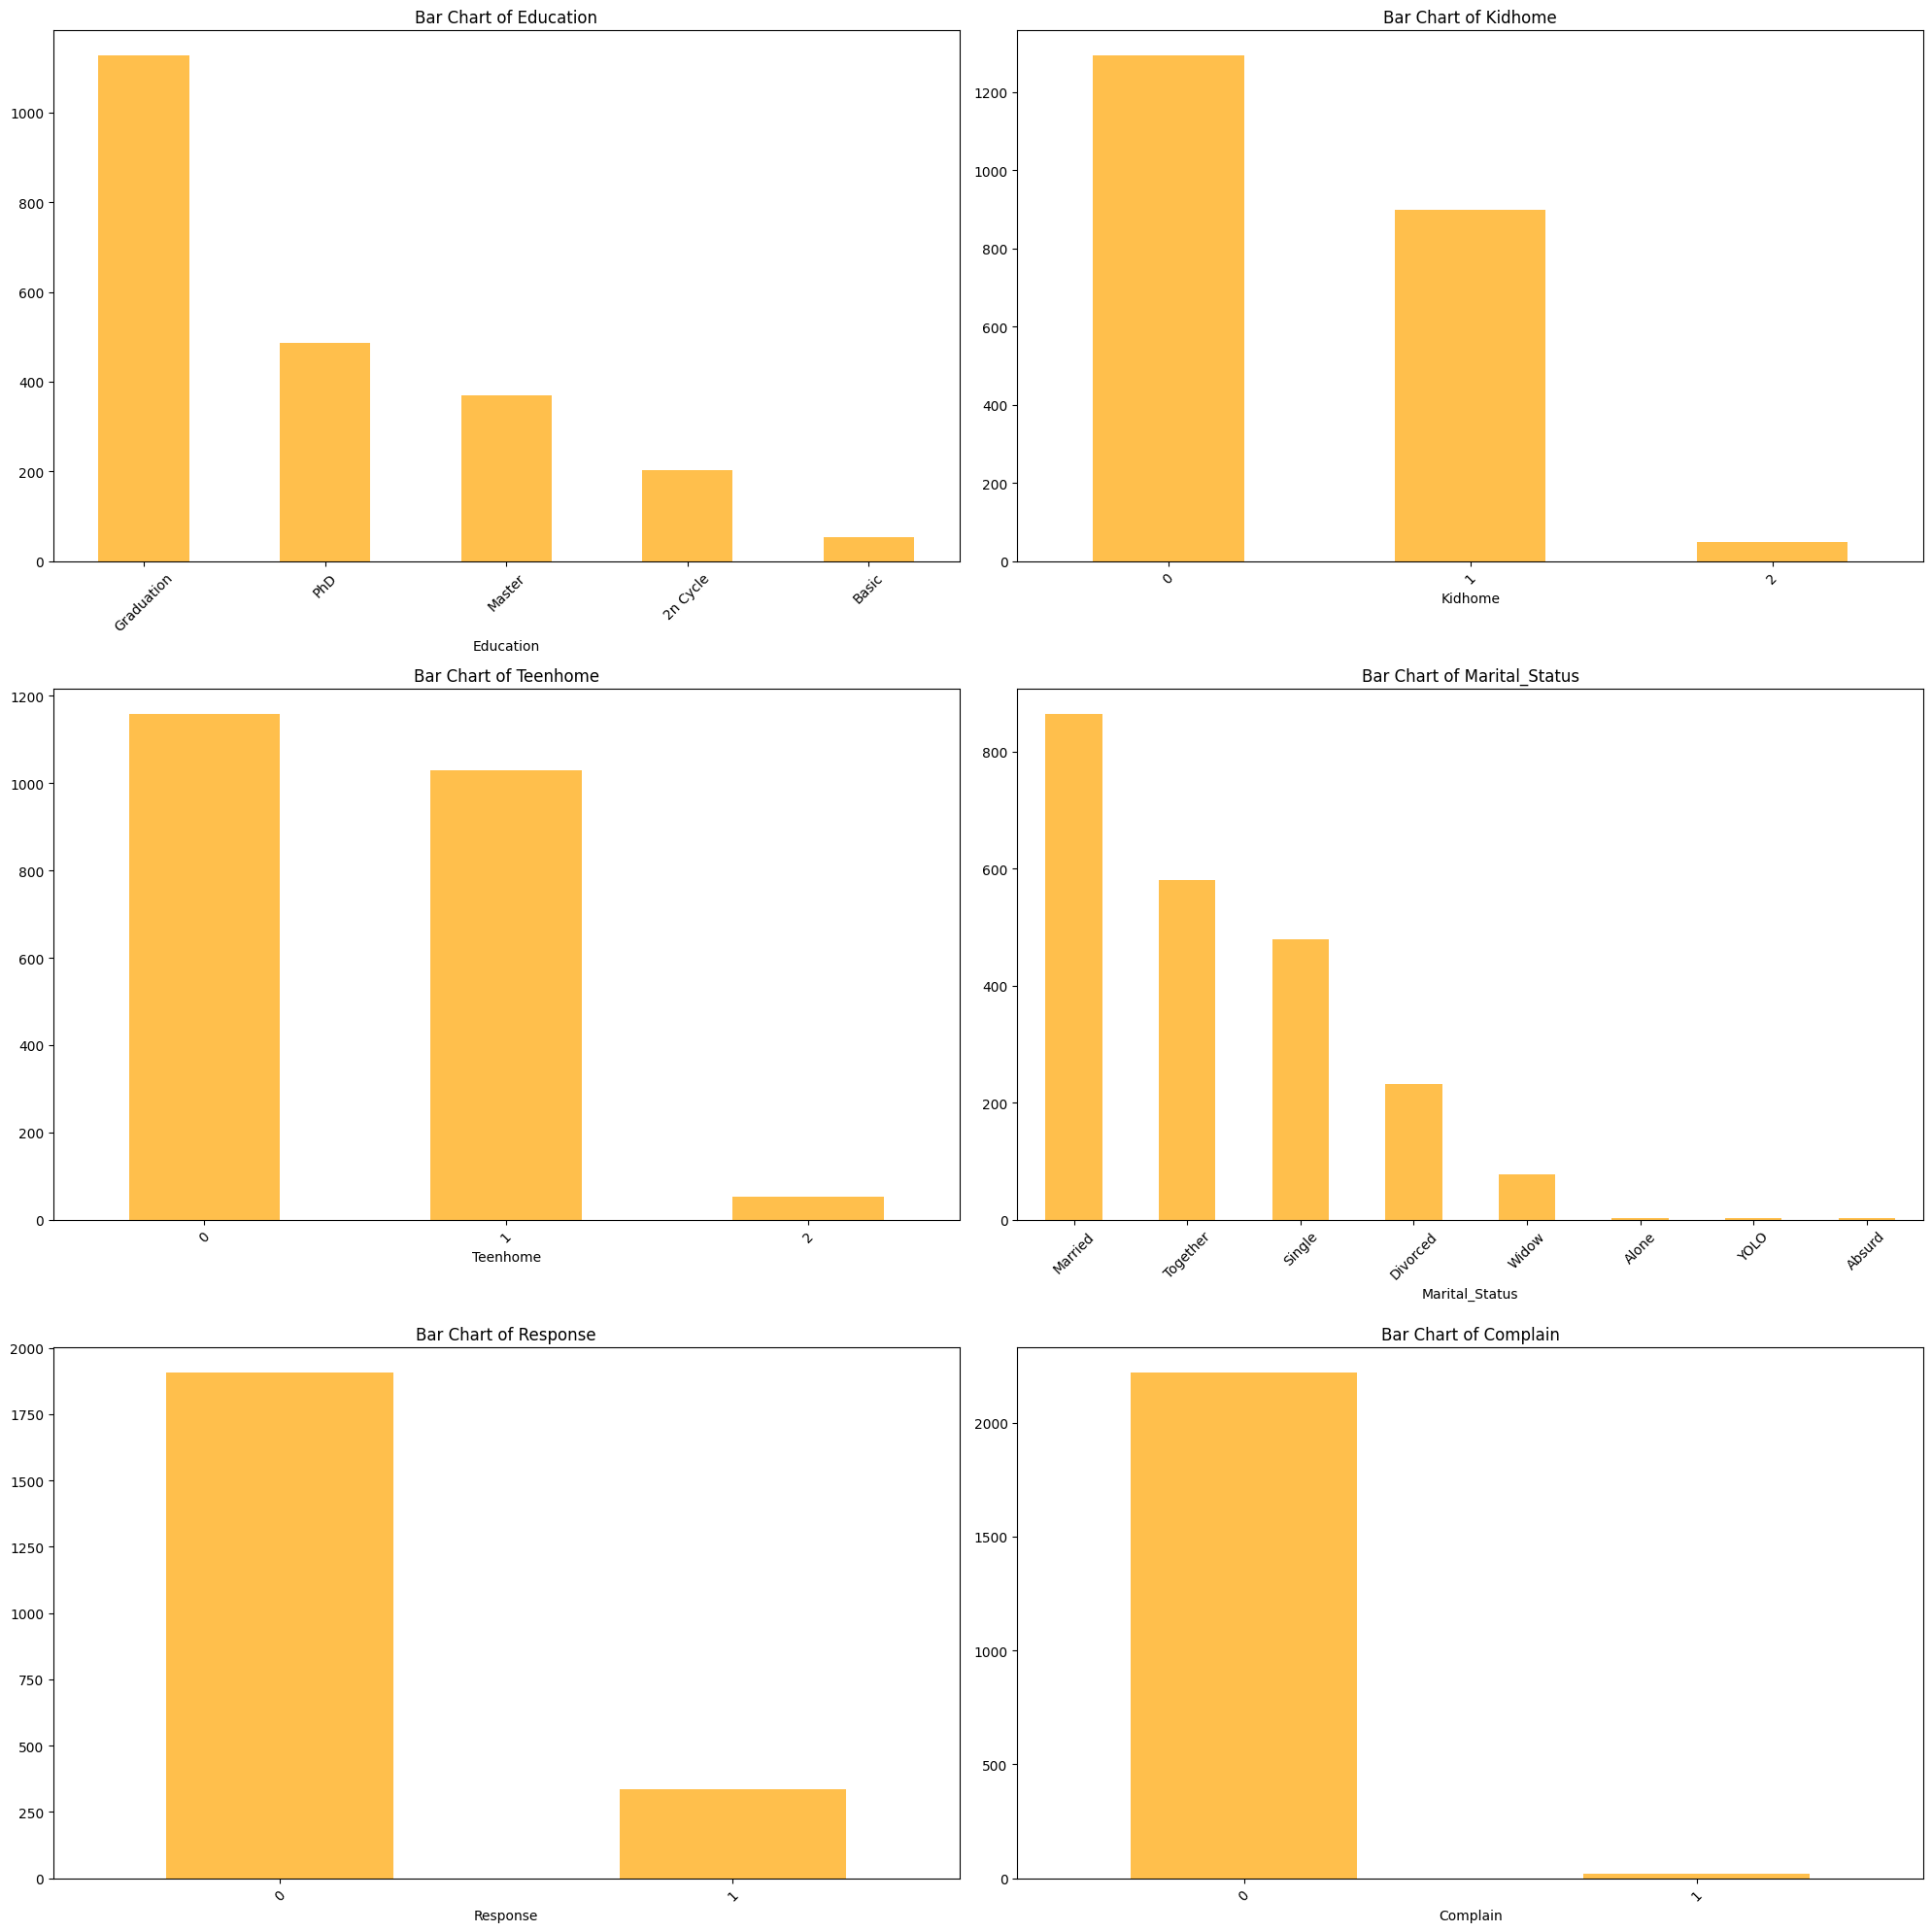

In [ ]:
# Bar charts for categorical data
plt.figure(figsize=(20, 20)) # Adjusted figure size to accommodate more subplots
# Calculating the number of rows needed for subplots
num_rows = int(np.ceil(len(cat_cols) / 2))

for i, column in enumerate(cat_cols, 1):
    plt.subplot(num_rows, 2, i)  # Adjusted subplot layout using num_rows
    superstore[column].value_counts().plot(kind='bar', color='orange', alpha=0.7)
    plt.title(f"Bar Chart of {column}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

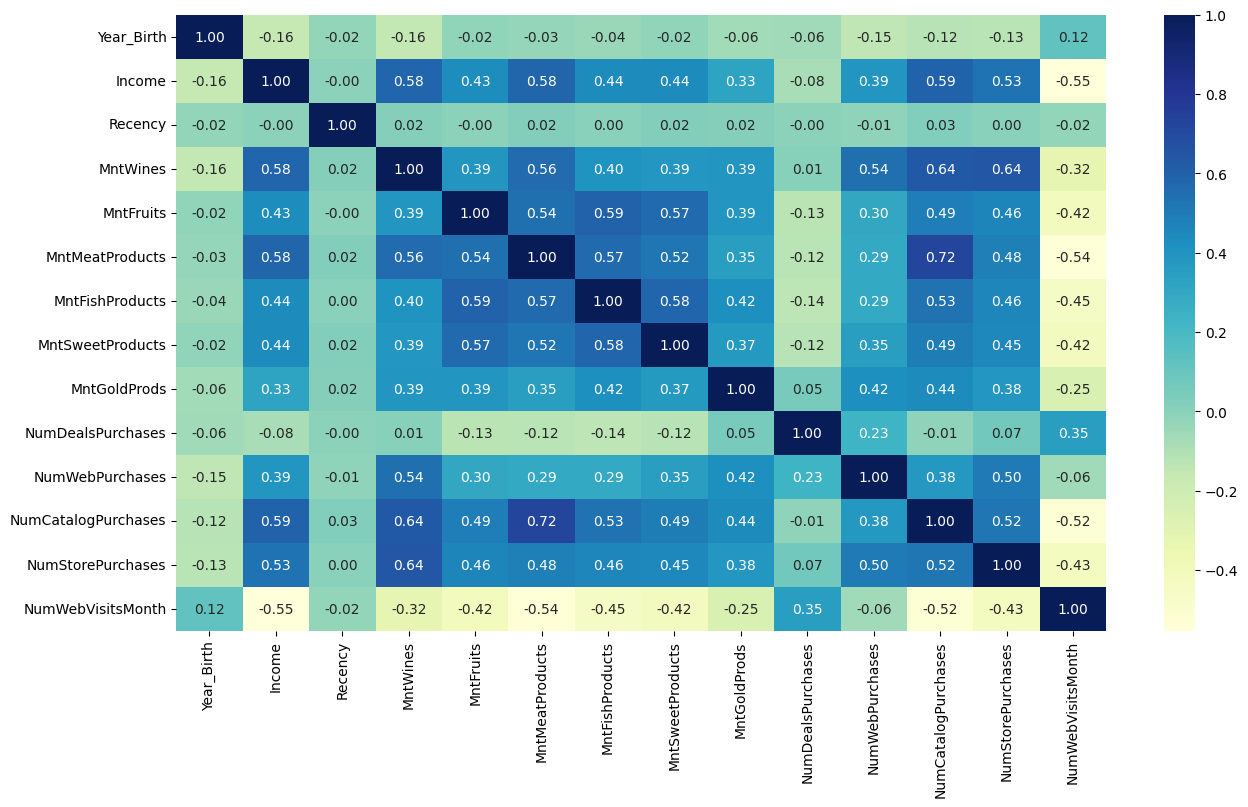

In [ ]:
#plotting the correation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(superstore[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

Univariate analysis

In [ ]:
#Printing the % sub categories of each category
for i in cat_cols:
    print(superstore[i].value_counts(normalize=True))
    print('*'*40)

Education
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: proportion, dtype: float64
****************************************
Kidhome
0    0.577232
1    0.401339
2    0.021429
Name: proportion, dtype: float64
****************************************
Teenhome
0    0.516964
1    0.459821
2    0.023214
Name: proportion, dtype: float64
****************************************
Marital_Status
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
YOLO        0.000893
Absurd      0.000893
Name: proportion, dtype: float64
****************************************
Response
0    0.850893
1    0.149107
Name: proportion, dtype: float64
****************************************
Complain
0    0.990625
1    0.009375
Name: proportion, dtype: float64
****************************************


Bivariate analysis

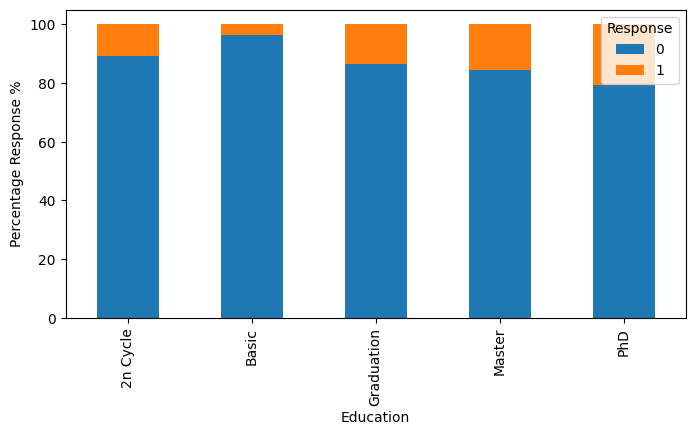

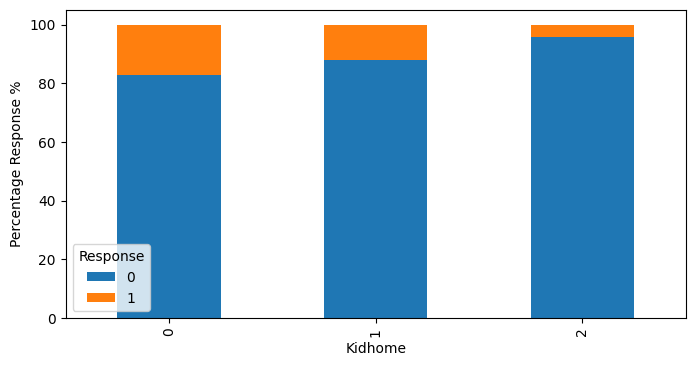

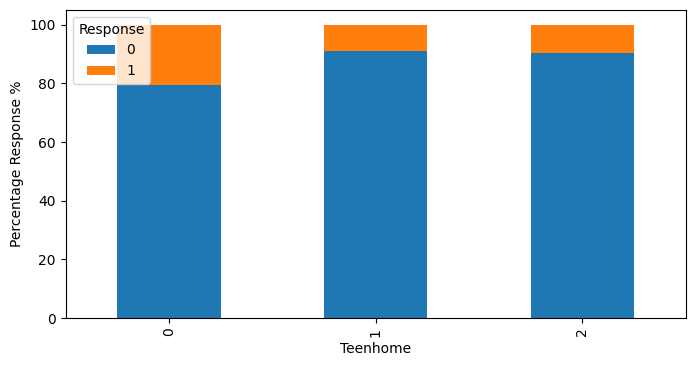

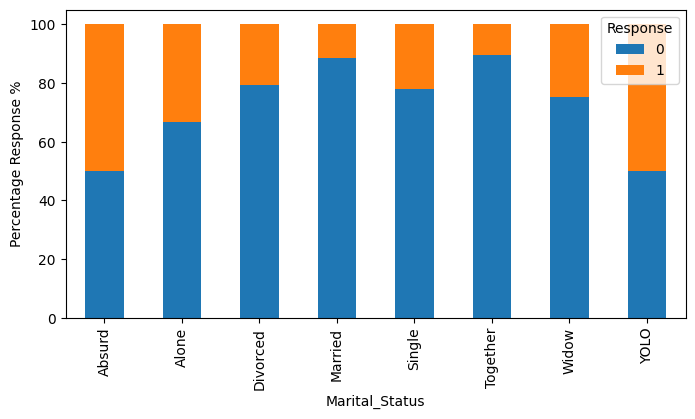

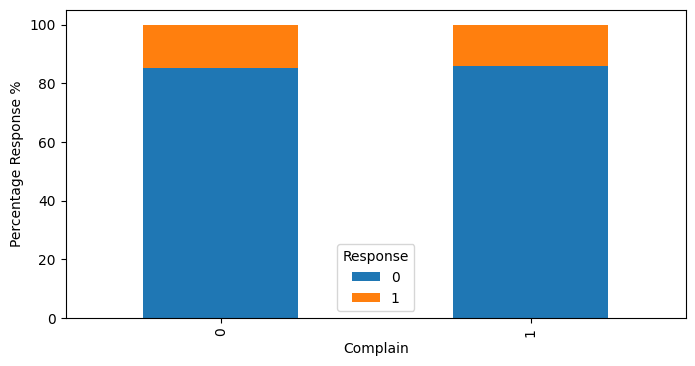

In [ ]:
for i in cat_cols:
    if i!='Response':
        (pd.crosstab(superstore[i],superstore['Response'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Response %')

In [ ]:
#Mean of numerical varibles grouped by attrition
superstore.groupby(['Response'])[num_cols].mean()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Response,,,,,,,,,,,,,,
0,1968.698846,50839.132767,51.514690,269.104407,24.216684,144.624344,34.980063,25.035152,40.968520,2.323190,3.911857,2.391920,5.736621,5.320567
1,1969.416168,60209.675676,35.383234,502.703593,38.203593,294.353293,52.050898,38.634731,61.446108,2.335329,5.071856,4.203593,6.095808,5.293413


In [ ]:
# Convert ordinal variables
ordinal_map = {"Low": 0, "Medium": 1, "High": 2}

# Check and map 'Kidhome'
if 'Kidhome' in superstore.columns and superstore['Kidhome'].dtype == 'object':
    superstore['Kidhome'] = superstore['Kidhome'].map(ordinal_map)

# Check and map 'Teenhome'
if 'Teenhome' in superstore.columns and superstore['Teenhome'].dtype == 'object':
    superstore['Teenhome'] = superstore['Teenhome'].map(ordinal_map)


In [ ]:
# Convert nominal variables using get_dummies
categorical_columns = superstore.select_dtypes(include=['object']).columns
superstore = pd.get_dummies(superstore, columns=categorical_columns, drop_first=True)
print(superstore)

      Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
0           1970  84835.0        0         0  2014-06-16        0       189   
1           1961  57091.0        0         0  2014-06-15        0       464   
2           1958  67267.0        0         1  2014-05-13        0       134   
3           1967  32474.0        1         1  2014-11-05        0        10   
4           1989  21474.0        1         0  2014-08-04        0         6   
...          ...      ...      ...       ...         ...      ...       ...   
2235        1976  66476.0        0         1  2013-07-03       99       372   
2236        1977  31056.0        1         0  2013-01-22       99         5   
2237        1976  46310.0        1         0  2012-03-12       99       185   
2238        1978  65819.0        0         0  2012-11-29       99       267   
2239        1969  94871.0        0         2  2012-01-09       99       169   

      MntFruits  MntMeatProducts  MntFishProducts  

In [ ]:

# # Print the data to confirm that missing values have been filled
# print("Data after filling missing values:")
# print(superstore.isnull().sum())

In [ ]:
# Create a new feature for total children( Feature Engineering)
superstore['Total_Children'] = superstore['Kidhome'] + superstore['Teenhome']

In [ ]:
# Step 3: Correlation analysis to remove highly correlated features# Step 3: Correlation analysis to remove highly correlated features
# Select only numerical features for correlation analysis
numerical_features = superstore.select_dtypes(include=np.number).columns
correlation_matrix = superstore[numerical_features].corr()

threshold = 0.9  # Define a threshold for correlation
high_corr_pairs = [(column, other_column)
                   for column in correlation_matrix.columns
                   for other_column in correlation_matrix.columns
                   if column != other_column and correlation_matrix[column][other_column] > threshold]

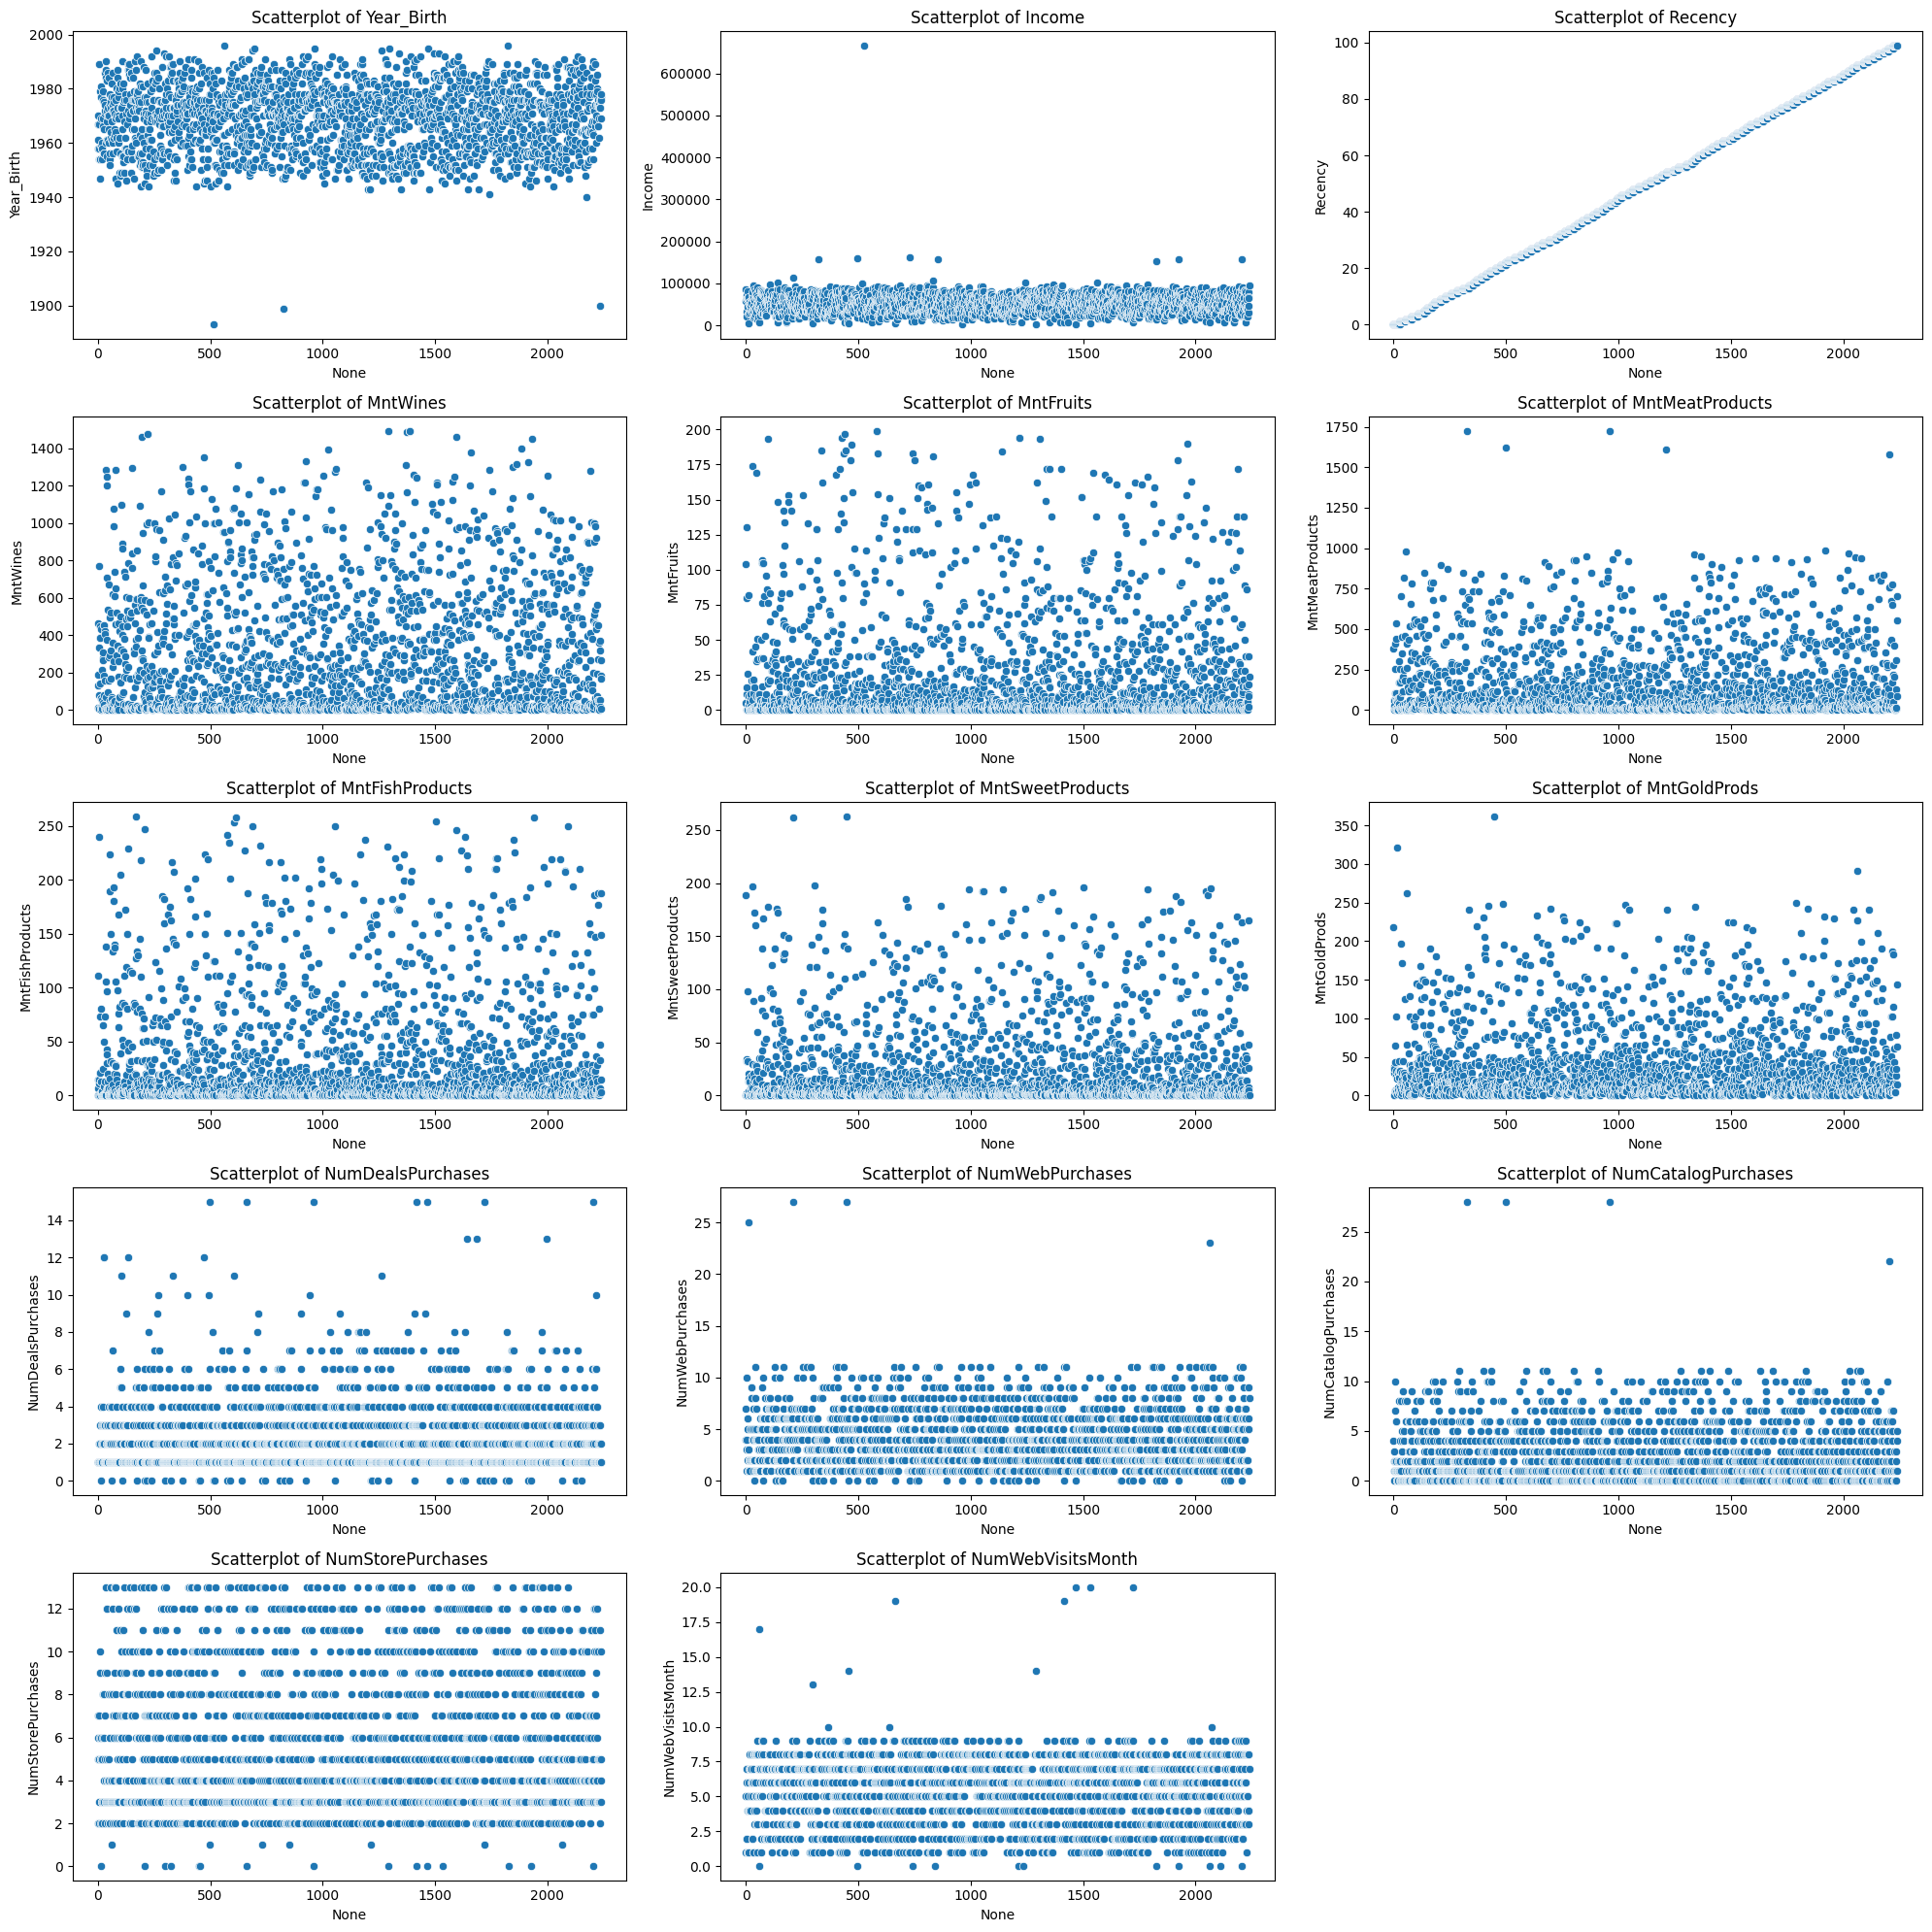

In [ ]:
#Scatterplots for outlier detection
plt.figure(figsize=(20, 20))
for i, column in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 3 + 1, 3, i)
    sns.scatterplot(x=superstore.index, y=superstore[column])
    plt.title(f"Scatterplot of {column}")
plt.tight_layout()
plt.show()

In [ ]:
#Removing row containing outliers
q99 = superstore['Income'].quantile(0.99)
superstore = superstore[superstore['Income'] <= q99]

In [ ]:
# # Scale predictor variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

predictors = superstore.drop(columns=['Response'])  # Example target variable
scaled_data = scaler.fit_transform(predictors)
scaled_data = pd.DataFrame(scaled_data, columns=predictors.columns)

# Add the target variable back
scaled_data['Response'] = superstore['Response']  # Now it's numeric and can be added back


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.Int64DType'>)

In [ ]:
mean_value = scaled_data['Response'].mean()  # Calculate mean
scaled_data['Response'].fillna(mean_value)  # Fill NaN with mean
print(scaled_data['Response'].isnull().sum())  # Should print 0

In [ ]:
# # Add the target variable back
scaled_data['Response'] = superstore['Response']

Fill the missing values of response

In [ ]:
# Step 6: Split data into training and testing sets
X = scaled_data.drop(columns=['Response'])
y = scaled_data['Response']
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_train.mean())
# Output summary
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

#Model Fit and evaluation

In [ ]:
#algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#for tuning the model
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def metrics_score(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')

    try:
        auc = roc_auc_score(y_true, y_pred)
    except ValueError:
        auc = None  # Handle cases where AUC cannot be calculated

    print(f"{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if auc is not None:
        print(f"AUC: {auc:.4f}")
    else:
        print("AUC cannot be calculated for non-probabilistic predictions.")

    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'AUC': auc}  # Return the metrics as a dictionary

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier(random_state=42)

In [ ]:
# Fit the model
print(y_train.isnull().sum())
# Filter and display rows where the Response column equals 1
y_train = y_train.astype(int)
y_test = y_test.astype(int)
model.fit(X_train, y_train)

In [ ]:
# Predictions for the test set
y_pred_rf = model.predict(X_test)

In [ ]:
#Performance of Training data
y_train_pred_rf=model.predict(X_train)
metrics_score(y_train,y_train_pred_rf)

In [ ]:
##Performace of Testing data
y_pred_test_rf = model.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

In [ ]:
# Confusion Matrix for Testing Data
conf_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)
print("Confusion Matrix - Random Forest Classifier (Test Data):")
print(conf_matrix_rf)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Instantiate and fit the model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

In [ ]:
# Performance on Training Data
y_train_pred_lr = log_reg_model.predict(X_train)
print("Logistic Regression - Training Data Performance:")
metrics_score(y_train, y_train_pred_lr)

In [ ]:
# Performance on Testing Data
y_pred_lr = log_reg_model.predict(X_test)
print("Logistic Regression - Test Data Performance:")
metrics_score(y_test, y_pred_lr)

In [ ]:
# Confusion Matrix for Testing Data
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix - Logistic Regression (Test Data):")
print(conf_matrix_lr)

In [ ]:
#KNN Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and fit the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

In [ ]:
# Performance on Training Data
y_train_pred_knn = knn_model.predict(X_train)
print("KNN - Training Data Performance:")
metrics_score(y_train, y_train_pred_knn)

In [ ]:
# Performance on Testing Data
y_pred_knn = knn_model.predict(X_test)
print("KNN - Test Data Performance:")
metrics_score(y_test, y_pred_knn)

In [ ]:
# Confusion Matrix for Testing Data
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix - KNN (Test Data):")
print(conf_matrix_knn)

In [ ]:
#SVM

In [ ]:
from sklearn.svm import SVC

# Instantiate and fit the model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

In [ ]:
# Performance on Training Data
y_train_pred_svm = svm_model.predict(X_train)
print("SVM - Training Data Performance:")
metrics_score(y_train, y_train_pred_svm)

In [ ]:
# Performance on Testing Data
y_pred_svm = svm_model.predict(X_test)
print("SVM - Test Data Performance:")
metrics_score(y_test, y_pred_svm)

In [ ]:
# Confusion Matrix for Testing Data
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix - SVM (Test Data):")
print(conf_matrix_svm)

In [ ]:
#Cross-validation and Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Performance on Testing Data
y_pred_best_rf = best_rf_model.predict(X_test)
print("Best Random Forest - Test Data Performance:")
metrics_score(y_test, y_pred_best_rf)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))

# Confusion Matrix for Best Model
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print("Confusion Matrix - Best Random Forest (Test Data):")
print(conf_matrix_best_rf)

# Feature Importance for Best Random Forest
importances_best_rf = best_rf_model.feature_importances_
print("Feature Importance - Best Random Forest:")
for feature, importance in zip(X_train.columns, importances_best_rf):
    print(f"Feature: {feature}, Importance: {importance}")
